Loading libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Datasets

In [6]:
# Path with antenna connected with magnet at distance 0 cm
path_with_antenna = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/wLoopOnNPwaterball.CSV"
# Path without antenna connected
path_without_antenna = "/content/drive/MyDrive/yellow_floppyDisk/20231129_WaterAntenna/TXT101_wLoopConnected.CSV"

# Skipping the initial header lines
data_start_line = 11

# Loading data
df_with_antenna = pd.read_csv(path_with_antenna, skiprows=data_start_line).iloc[:, :2]
df_without_antenna = pd.read_csv(path_without_antenna, skiprows=data_start_line).iloc[:, :2]

print("Data With Antenna (0 cm):")
print(df_with_antenna.head())
print("\nData Without Antenna:")
print(df_without_antenna.head())


Data With Antenna (0 cm):
          Hz     dB
0  500000000 -0.378
1  505000000 -0.315
2  510000000 -0.249
3  515000000 -0.257
4  520000000 -0.260

Data Without Antenna:
          Hz     dB
0  500000000 -0.441
1  505000000 -0.396
2  510000000 -0.364
3  515000000 -0.360
4  520000000 -0.373


Preparing Data for Plotting

In [7]:
# Aligning the data from both DataFrames based on the frequency
df_combined = df_with_antenna.copy()
df_combined['dB_without_antenna'] = df_without_antenna['dB']

# Calculating the difference and ratio
df_combined['Difference'] = df_combined['dB'] - df_combined['dB_without_antenna']
df_combined['Ratio'] = df_combined['dB'] / df_combined['dB_without_antenna']


Plot the Difference

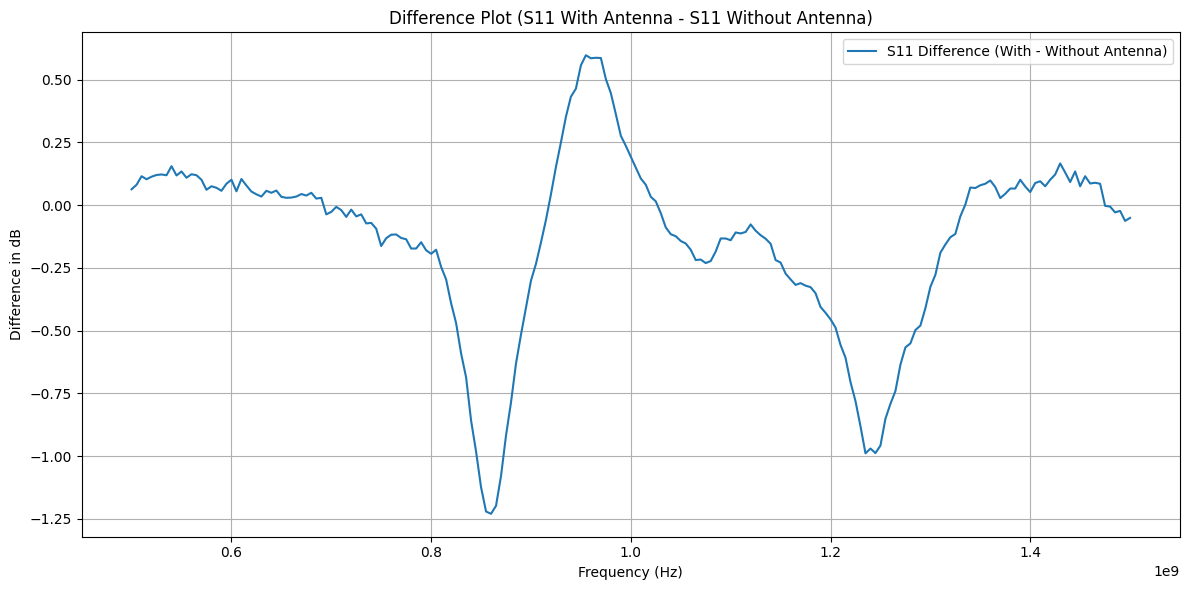

In [8]:
# Plotting the Difference Plot
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Hz'], df_combined['Difference'], label='S11 Difference (With - Without Antenna)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Difference in dB')
plt.title('Difference Plot (S11 With Antenna - S11 Without Antenna)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Plot the Ratio

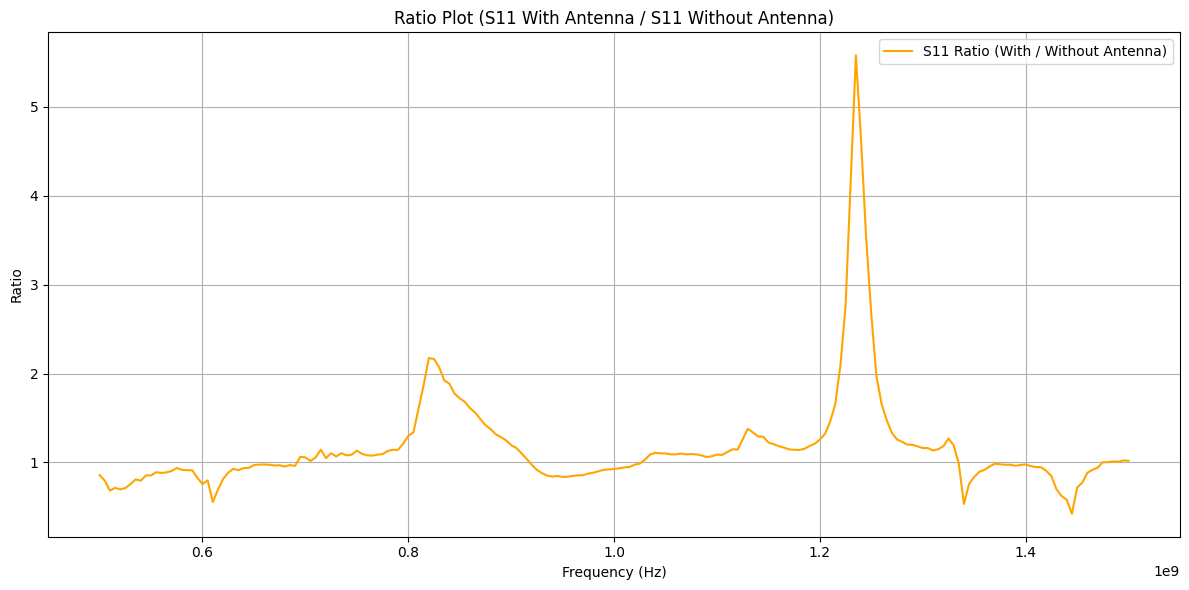

In [9]:
# Plotting the Ratio Plot
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Hz'], df_combined['Ratio'], label='S11 Ratio (With / Without Antenna)', color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Ratio')
plt.title('Ratio Plot (S11 With Antenna / S11 Without Antenna)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
